<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2 - Programación dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

En esta práctica de una única sesión implementaremos un algoritmo de programación dinámica, Dynamic Time Warping (DTW), para encontrar el matching "óptimo" de un vector de reales de entrada dentro de un vector de posible longitud "infinita" minimizando un criterio de distancia.

Como se ha comentado en clase de teoría, los algoritmos de programación dinámica definen una función de coste que se aplica sobre un conjunto de subproblemas (más fáciles de resolver que la solución global), de tal forma que la solución en una nueva iteración está compuesta de soluciones óptimas parciales, asegurando la optimalidad de la solución final. 

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>DTW</p></h2>
  
  <div class="row">
  <div>
  <p style="text-align: justify; padding-right: 30px">
  Implementa el algoritmo DTW presentado en clase de teoría. Para ello, las entradas serán 2 vectores, el patron a buscar, y el vector donde encontrar el patrón. Usaremos valores reales en cada posición del vector, que hipotéticamente representarán valores de un sensor inercial situado en la muñeca de un usuario que realiza gestos con el objetivo de interaccionar con una interfaz. El código debe implementar DTW de tal forma que la salida sea, el coste de la asociación más factible, mostrando la posición de inicio-fin dentro del segundo vector.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>V1: vector patrón.</li>
<li>V2: vector sobre el cual encontrar el inicio-fin más factible de V1.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El coste de la asociación más factible, mostrando la posición de inicio-fin dentro del segundo vector.
</p>

</div>

In [ ]:
#Utilitzo la llibreria numpy per treballar amb matrius. Mes comode per mi
get_ipython().magic(u'pylab inline')
#Limito els decimals a 1, treballo millor aixi
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

**Atencio: en la meva implementacio, la matriu esta girada, és a dir,
el patro el poso en columnes (x) i el vector en files (y)**

In [53]:

def DTW(x,y):
    
    #Creo la matriu de distancies. np.zeros = la inicialitza a zeros
    matrix = np.zeros((len(y), len(x)))
    
    #Per cada fila, per cada columna:
    for i in range(len(y)):
        for j in range(len(x)):
            #Calcula la seva distancia euclidiana i insereixa a la matriu
            matrix[i,j] = distancia_euclidiana(x[j],y[i])
    
    #print matrix
    
    #Aquesta sera la matriu que contindra els costos acumulats, inicialitzada
    #a zero
    matrix_Cost = warping_path(matrix,x,y)
            

    path, cost,start,end = backtracking(x,y,matrix_Cost,matrix)
                        
    print "\nPath:\n",path, "\nCost:",cost,"\nComença:\n",start,"\nAcaba:\n",end
    
def distancia_euclidiana(x,y):
    return pow(abs(x-y),2)

def warping_path(matrix,x,y):
    
    #############################################################
    #Per crear una correlacio ente les dos senyals, necesitem   #
    #crear una ruta en la matriu. Obligatoriament, aquesta ha de#
    #començar a (0,0) y vol arribar a (m,n) (longituds de les   #
    #dues senyals). Es a dir, el nostre objectiu es trobar el   #
    #minim cami de la distancia minima. Aquest cami, te algunes #
    #reestriccions: no podem "tornar enrere", el cami nomes va  #
    #cap endavant. Si estem a (i,j), podem anar recte ((i+1,1)) #
    #cap a dalt (i,j+1) o en diagonal (i+1,j+1)                 #
    #############################################################

    
    matrix_Cost = np.zeros((len(y), len(x)))
    
    #Com que partim de (0,0), el cost acumulat en aquest punt es matrix(0,0)
    matrix_Cost[0,0] = matrix[0,0]

    for i in range(1, len(x)): #Ens movem per la columna, cap a la dreta

        matrix_Cost[0,i] = matrix[0,i] + matrix_Cost[0, i-1]
        
    for i in range(1, len(y)): #Ens movem per la fila, cap a dalt
        matrix_Cost[i,0] = matrix[i,0]+matrix_Cost[i-1,0]

    for i in range(1, len(y)): #Per la resta
        for j in range(1, len(x)):
            matrix_Cost[i, j] = min(matrix_Cost[i-1, j-1],
                                         matrix_Cost[i-1, j], 
                                         matrix_Cost[i, j-1]) + matrix[i, j]
    
    #Ara tenim la matriu que conte el cost de tots els camins a partir de (0,0)
    #El seguent pas es trobar el cami minimitzant la distancia, per backtracking
    return matrix_Cost


def backtracking(x,y,matrix_Cost,matrix):
    
    #############################################################
    #El proces de bactracking en el meu cas consisteix en moures#
    #desde lultim punt (m,n) i trobar el punt on hauriem arribat#
    #sempre minimitzant el cost                                 #
    #############################################################
    
    
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    
    i = len(y)-1
    j = len(x)-1
    
    while i>0 and j>0:
        if i==0:
            j = j - 1
        elif j==0:
            i = i - 1
        else:
            if matrix_Cost[i-1, j] == min(matrix_Cost[i-1, j-1], 
                                          matrix_Cost[i-1, j], 
                                          matrix_Cost[i, j-1]):
                i = i - 1
            elif matrix_Cost[i, j-1] == min(matrix_Cost[i-1, j-1],
                                            matrix_Cost[i-1, j],
                                            matrix_Cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
        
    path.append([0,0])
    
    #Tinc el path, calculo la distancia
    for [y, x] in path:
        cost = cost +matrix[x, y]
        
    #Retorno tambe on comença i on acaba dins del vector
    end = path[len(path)-1][1]
    
    start = path[0][1]
    
    #Extra: vull veure el cami representat
    
    pathX = [punt[0] for punt in path]
    pathY = [punt[1] for punt in path]
    
    plot(matrix_Cost)
    plt.plot(pathX,pathY)

    return path, cost, start,end

def plot(distancies):
    #Les instruccions per imprimir aquest grafic les he tret totalment
    #de la documentacio (a internet) de la lliberia pyplot
    im = plt.imshow(distancies, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> 

</div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. Implementar un juego de test y justificar los resultados
#### 2. Análisis de complejidad de vuestra implementación


Calculem amb Dynamic Time Warping

Path:
[[6, 5], [5, 4], [4, 3], [3, 2], [2, 1], [2, 0], [0, 0]] 
Cost: 2.0 
Comença:
5 
Acaba:
0

Mirem representat el seu cami:


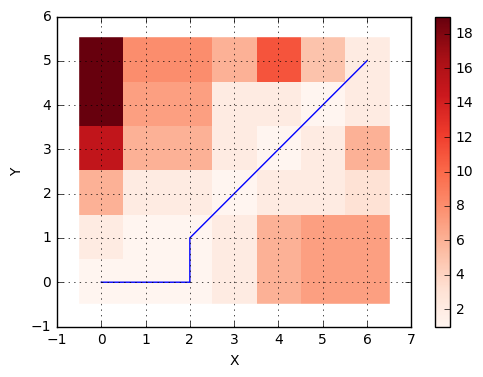

In [54]:
# Test #

#Cas trivial#

#Patró
v2 = np.array([1, 1, 2, 3, 2, 0])
#Vector que hem captat
v1 = np.array([0, 1, 1, 2, 3, 2, 1])

print "\nCalculem amb Dynamic Time Warping"

DTW(v1,v2)

print "\nMirem representat el seu cami:"


Calculem amb Dynamic Time Warping

Path:
[[16, 5], [15, 4], [14, 4], [13, 4], [12, 4], [11, 4], [10, 4], [9, 4], [8, 4], [7, 4], [6, 4], [5, 4], [4, 4], [3, 4], [2, 3], [1, 3], [0, 2], [0, 0]] 
Cost: 2374.79 
Comença:
5 
Acaba:
0

Mirem representat el seu cami:


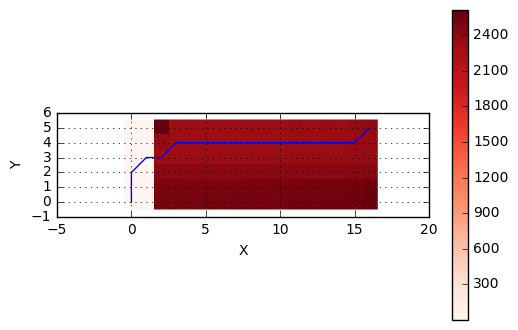

In [56]:
# Test #

#Cas no tan trivial#

#Patró
v2 = np.array([1, 1.1, 2.1, 3, 2.4, 0])
#Vector que hem captat
v1 = np.array([2,5,51,1,0,1,1.1,2.1,3,2.4,1,5,2,3,1,5,6])

print "\nCalculem amb Dynamic Time Warping"

DTW(v1,v2)

print "\nMirem representat el seu cami:"

**Analisi de la complexitat**

Per tropar el path tenim que:

* La ruta comença per (0,0) i acaba en (m,n)
* No podem tornar enrere: o anem endavant, cap a la dreta o en diagonal


De manera que aquestes restriccions impedeixen l'explosió combinatòria, es a dir, l'exploracio per força bruta, i converteixen el problema a un problema de programació dinàmica que pot ser resolt en temps O(M·N), on "m" es la mida del vector i "n" es la mida del patró a buscar en el vector.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 25 de diciembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y las secciones de comentarios debidamente rellenadas.
</p>

<p>
Este fichero es la parte 1/2 de la segunda entrega, correspondiente a algoritmos de programación dinámica.
</p>

<p>
La entrega tiene que consistir en un solo fichero **.ipynb** con el nombre: AA\_*Apellido1Apellido2*_*Nombre*_dp1.ipyn
</p>